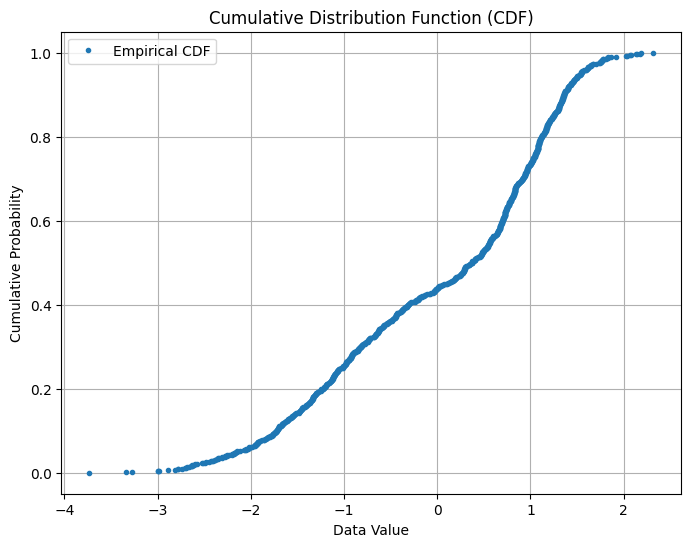

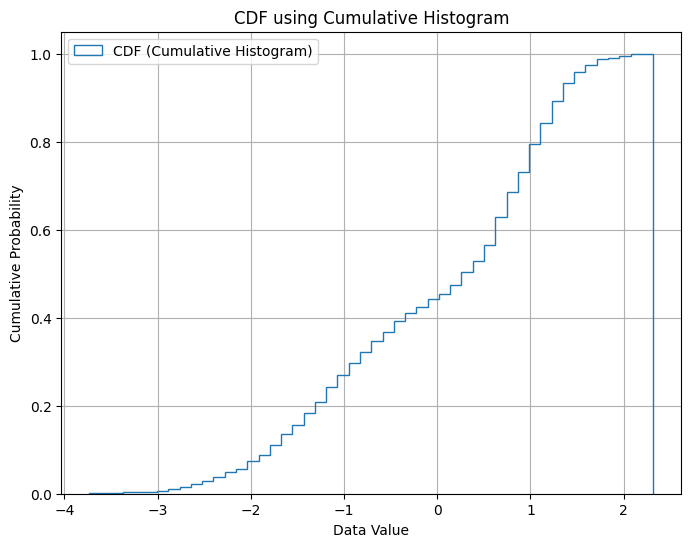

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification # Example for data generation

# 1. Generate some sample data (e.g., from a classification problem)
# In a real-world scenario, this would be your actual data.
X, _ = make_classification(n_samples=1000,
                            n_features=1,
                            n_classes=1,
                              n_informative=1, 
                              n_redundant=0, 
                             )
data = X.flatten() # Flatten the 1-feature array into a 1D array

# 2. Calculate the Empirical CDF
# Sort the data
sorted_data = np.sort(data)

# Calculate the y-values for the CDF (cumulative probabilities)
# Each data point gets a rank, which is then normalized by the total number of points.
y_cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# 3. Plot the CDF using Matplotlib
plt.figure(figsize=(8, 6))
plt.plot(sorted_data, y_cdf, marker='.', linestyle='none', label='Empirical CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Data Value')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.legend()
plt.show()

# Alternative using matplotlib's hist with cumulative=True
plt.figure(figsize=(8, 6))
plt.hist(data, bins=50, density=True, cumulative=True, histtype='step', label='CDF (Cumulative Histogram)')
plt.title('CDF using Cumulative Histogram')
plt.xlabel('Data Value')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.legend()
plt.show()

1d_hard_prediction_plot.png


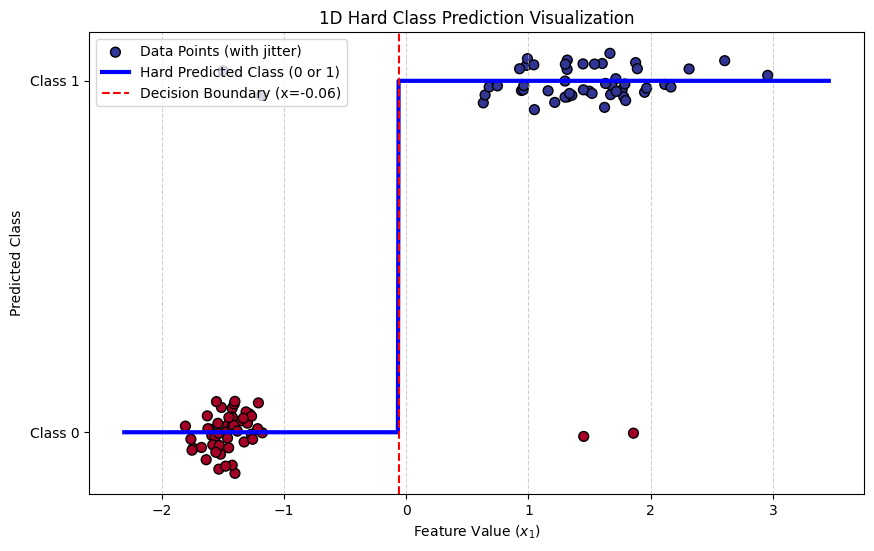

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 1. Setup (Same as before)
X, y = make_classification(n_samples=100, n_features=1, n_informative=1,
                           n_redundant=0, n_clusters_per_class=1, flip_y=0.1,
                           class_sep=1.5, random_state=42)
clf = LogisticRegression()
clf.fit(X, y)

# 2. Generate grid points
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x_plot = np.linspace(x_min, x_max, 1000).reshape(-1, 1)

# 3. Calculate HARD CLASS PREDICTIONS
y_preds = clf.predict(x_plot)

# 4. Plot the data and the hard prediction line

plt.figure(figsize=(10, 6))

# Plot the training data points
jitter = np.random.normal(0, 0.05, size=y.shape)
plt.scatter(X[:, 0], y + jitter, c=y, cmap=plt.cm.RdYlBu,
            edgecolor='k', marker='o', s=50, label='Data Points (with jitter)')

# Plot the hard predicted class line (The step function)
plt.plot(x_plot[:, 0], y_preds, label='Hard Predicted Class (0 or 1)',
         color='blue', linewidth=3)

# Find and plot the decision boundary
# Find the index where the prediction switches from 0 to 1
switch_index = np.argmax(y_preds)
decision_boundary_x = x_plot[switch_index, 0]

plt.axvline(x=decision_boundary_x, color='red', linestyle='--',
            label=f'Decision Boundary (x={decision_boundary_x:.2f})')

# Set labels and title
plt.title('1D Hard Class Prediction Visualization')
plt.xlabel('Feature Value ($x_1$)')
plt.ylabel('Predicted Class')
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.legend(loc='upper left')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.savefig('1d_hard_prediction_plot.png')
print("1d_hard_prediction_plot.png")
